In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

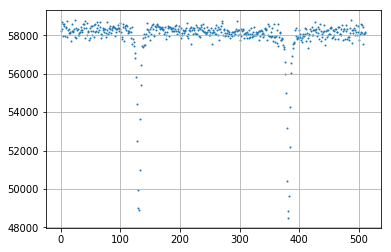

In [68]:
data = np.loadtxt('StainlessSteelFoil_Jan13_fullData.Asc', skiprows=0)
data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2

plt.figure()
plt.grid(True)
# plt.title("Column 2 and 3 vs. Column 1")
# plt.ylabel("Column 2 and 3", fontsize = 14)
# plt.xlabel("Column 1", fontsize = 14)

plt.scatter(data[0], data[1], s = 1)
plt.show()

ydataerr = np.sqrt(data[1])

def lorentzian(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma**2/denom + b

def lorentzian1(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma/denom + b

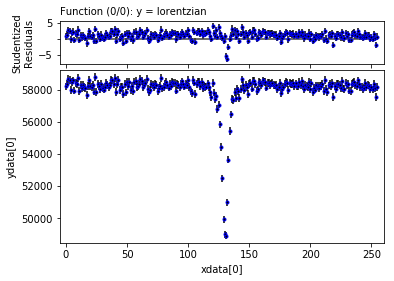

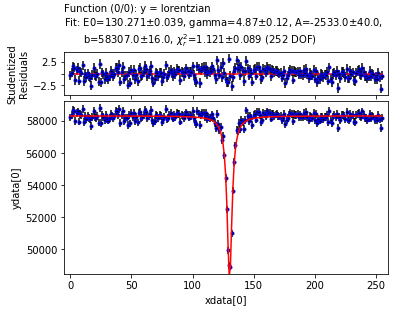

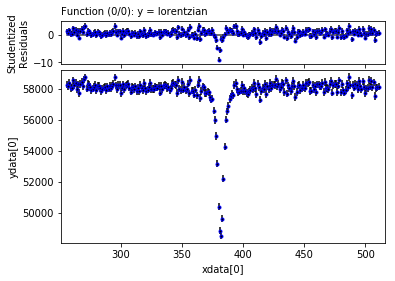

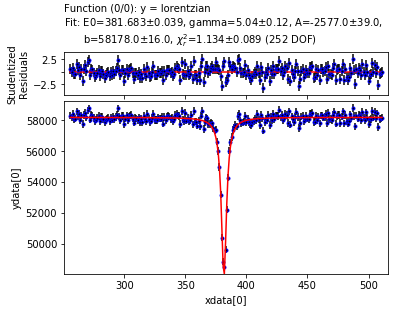


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 2.071 +/- 0.089, 252.0 DOF)
  E0         = 382.0
  gamma      = 5.0
  A          = -2300.0
  b          = 58000.0

FIT RESULTS (reduced chi^2 = 1.134 +/- 0.089, 252 DOF)
  E0        

In [67]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
#help(s.data.fitter)
my_fitter.set_functions(f=lorentzian, p='E0=130,gamma=5,A=-2300,b=58000')
my_fitter.set_data(xdata=data[0][0:256], ydata=data[1][0:256], eydata=ydataerr[0:256])
my_fitter.fit()

my_fitter1 = s.data.fitter()
my_fitter1.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
#help(s.data.fitter)
my_fitter1.set_functions(f=lorentzian, p='E0=382,gamma=5,A=-2300,b=58000')
my_fitter1.set_data(xdata=data[0][256:512], ydata=data[1][256:512], eydata=ydataerr[256:512])
my_fitter1.fit()
